# antiviral-potency-2025

What I intend to do here. 
- First get Polaris setup
- Option 1: Pre-train on MPRO then fine-tune
- Option 2: Use Active Learning to Select Optimal Training Samples


In [10]:
import sys
import os

# Navigate up from Polaris to THIS_STUDIO root
root_dir = os.path.abspath(os.path.join(os.getcwd(), "DD"))
sys.path.append(root_dir)

# Now import
from utils import *

In [11]:
CHALLENGE = "antiviral-potency-2025"
competition = po.load_competition(f"asap-discovery/{CHALLENGE}")
competition.cache()


[2025-03-02 18:31:11] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=438776;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=642612;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=809019;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=369264;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

[18:31:11] Copying to destination                                                                      ]8;id=419716;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=16871;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#380\380]8;;\
           /home/zeus/.cache/polaris/datasets/e35da41e-9fde-464c-8fab-2203e02231ef/data.zarr                       

           For large Zarr archives, this may take a while.                                             ]8;id=833379;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=636793;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#381\381]8;;\

[18:31:12]  Success: Copying Zarr keys                                                                ]8;id=224917;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=884628;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=498388;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=920442;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/zeus/.cache/polaris/datasets/e35da41e-9fde-464c-8fab-2203e02231ef'

In [12]:
train, test = competition.get_train_test_split()


In [13]:
train

In [15]:
train.X

array(['COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C |&1:3|',
       'C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC=CC=C12)C(N)=O',
       'CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C2=O)C2=C(C=CC(Cl)=C2)C1=O',
       ..., 'CNC(=O)[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1 |a:4|',
       'C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C |o1:1,19|',
       'O=C(O)C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1 |a:4|'],
      dtype='<U172')

In [16]:
Y = train.target_cols
Y

['pIC50 (SARS-CoV-2 Mpro)', 'pIC50 (MERS-CoV Mpro)']

In [17]:
for i in range(len(train)):
    print(train[i])

('COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C |&1:3|', {'pIC50 (SARS-CoV-2 Mpro)': nan, 'pIC50 (MERS-CoV Mpro)': 4.19})
('C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC=CC=C12)C(N)=O', {'pIC50 (SARS-CoV-2 Mpro)': 5.29, 'pIC50 (MERS-CoV Mpro)': 4.92})
('CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C2=O)C2=C(C=CC(Cl)=C2)C1=O', {'pIC50 (SARS-CoV-2 Mpro)': nan, 'pIC50 (MERS-CoV Mpro)': 4.73})
('C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC=CC=C12)C(=O)OC', {'pIC50 (SARS-CoV-2 Mpro)': 6.11, 'pIC50 (MERS-CoV Mpro)': 4.9})
('C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC=CC=C12)C(=O)O', {'pIC50 (SARS-CoV-2 Mpro)': 5.62, 'pIC50 (MERS-CoV Mpro)': 4.81})
('C=C(CN(C(=O)C1CCOC2=C1C=C(Cl)C=C2)C1=CN=CC2=CC=CC=C12)C(=O)NC1=CC=CC=C1', {'pIC50 (SARS-CoV-2 Mpro)': 6.45, 'pIC50 (MERS-CoV Mpro)': 4.88})
('C=C(CN(C(=O)C1CCOC2=C1C=C(Cl)C=C2)C1=CN=CC2=CC=CC=C12)C(N)=O', {'pIC50 (SARS-CoV-2 Mpro)': 5.56, 'pIC50 (MERS-CoV Mpro)': 4.81})
('CCN1CC2(C1)C(=O)N(C1=CN=CC3=CC=CC=C13)C(=O)N2C', {'pIC50 (SARS-CoV-2

('CCN1C=CC(CN(C(=O)CC2=CN=CC3=CC=CC=C23)C2=CC=C(C(C)C)C=C2)=N1', {'pIC50 (SARS-CoV-2 Mpro)': 5.38, 'pIC50 (MERS-CoV Mpro)': 4.43})
('O=C(CC1=CN=CC2=CC=CC=C12)N1C[C@H](C2CCCCC2)C[C@H]1C(F)(F)F', {'pIC50 (SARS-CoV-2 Mpro)': nan, 'pIC50 (MERS-CoV Mpro)': 4.26})
('C[C@H]1C[C@H](C2=CC=CC=C2)N(C(=O)CC2=CN=CC3=CC=CC=C23)C1 |&1:1,&2:3|', {'pIC50 (SARS-CoV-2 Mpro)': 4.82, 'pIC50 (MERS-CoV Mpro)': 5.38})
('O=C(NCC1=CC=CS1)[C@@H]1CN(C(=O)C2=CC=CN=C2)CCN1C1=CC=C(Cl)C(Cl)=C1', {'pIC50 (SARS-CoV-2 Mpro)': 6.91, 'pIC50 (MERS-CoV Mpro)': 4.24})
('CC1=CC=CC(CN(CC2=CC=CC=N2)C(=O)CC2=CN=CC3=CC=CC=C23)=C1', {'pIC50 (SARS-CoV-2 Mpro)': 4.48, 'pIC50 (MERS-CoV Mpro)': 4.62})
('O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@H](C2=CC=C(O)C=C2)C1 |&1:16|', {'pIC50 (SARS-CoV-2 Mpro)': 4.55, 'pIC50 (MERS-CoV Mpro)': 4.25})
('O=C(CC1=CN=CC2=CC=CC=C12)N1CC2=CC=CC=C2C[C@H]1C1=CC=CC=C1 |&1:22|', {'pIC50 (SARS-CoV-2 Mpro)': 5.49, 'pIC50 (MERS-CoV Mpro)': 4.79})
('O=C(CC1=CN=CC2=CC=CC=C12)N(CCC(F)(F)F)CC1=CC=CC=C1', {'pIC50 (SARS-CoV

In [18]:
import pandas as pd
import numpy as np

# Create empty lists to store the data
smiles = []
pIC50_MERS = []
pIC50_SARS = []

# Iterate through your dataset
for i in range(len(train)):
    item = train[i]
    # Extract SMILES string (first element of the tuple)
    smiles.append(item[0])
    # Extract pIC50 values (second element of the tuple is a dictionary)
    pIC50_MERS.append(item[1]['pIC50 (MERS-CoV Mpro)'])
    pIC50_SARS.append(item[1]['pIC50 (SARS-CoV-2 Mpro)'])

# Create the DataFrame
df = pd.DataFrame({
    'SMILES': smiles,
    'pIC50_MERS': pIC50_MERS,
    'pIC50_SARS': pIC50_SARS
})

# Display the first few rows of the DataFrame
print(df.head())

                                              SMILES  pIC50_MERS  pIC50_SARS
0  COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C...        4.19         NaN
1  C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...        4.92        5.29
2  CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C...        4.73         NaN
3  C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...        4.90        6.11
4  C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...        4.81        5.62


In [19]:
mpro_df = df
mpro_df

,SMILES,pIC50_MERS,pIC50_SARS
0,COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C...,4.19,NaN
1,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.92,5.29
2,CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C...,4.73,NaN
3,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.90,6.11
4,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.81,5.62
...,...,...,...
1026,CNS(=O)(=O)OCC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]...,5.57,6.38
1027,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@@H]2CCCC[C@H]2...,4.60,6.09
1028,CNC(=O)[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,4.22,NaN
1029,C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C ...,4.40,5.06


In [20]:
# drop all NaN values
mpro_df = mpro_df.dropna()
mpro_df

,SMILES,pIC50_MERS,pIC50_SARS
1,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.92,5.29
3,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.90,6.11
4,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,4.81,5.62
5,C=C(CN(C(=O)C1CCOC2=C1C=C(Cl)C=C2)C1=CN=CC2=CC...,4.88,6.45
6,C=C(CN(C(=O)C1CCOC2=C1C=C(Cl)C=C2)C1=CN=CC2=CC...,4.81,5.56
...,...,...,...
1021,O=C(CC1=CN=CC2=CC=CC=C12)N1CCC([C@H]2CCOC2)CC1...,4.27,4.68
1022,O=C(CC1=CN=CC2=CC=CC=C12)N1CCCC2(CC2)C1,4.11,4.41
1026,CNS(=O)(=O)OCC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]...,5.57,6.38
1027,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@@H]2CCCC[C@H]2...,4.60,6.09


In [22]:
X_train = mpro_df['SMILES']
Y_sars = mpro_df['pIC50_SARS']
Y_mers = mpro_df['pIC50_MERS']


In [23]:
X_train = np.array([dm.to_fp(dm.to_mol(smi)) for smi in mpro_df['SMILES']])
X_train
len(X_train), len(Y_sars), len(Y_mers)

(712, 712, 712)

In [24]:
X_test = np.array([dm.to_fp(dm.to_mol(smi)) for smi in test.X])
len(X_test)

297

In [25]:
y_pred = {}


In [26]:
X_train = torch.tensor(X_train, dtype=torch.uint8)
Y_sars = torch.tensor(Y_sars.to_numpy(), dtype=torch.float32)
Y_mers = torch.tensor(Y_mers.to_numpy(), dtype=torch.float32)


In [27]:
X_test = torch.tensor(X_test, dtype=torch.uint8)

In [28]:
Y_sars.dtype

torch.float32

In [29]:
X_train.dtype

torch.uint8

In [30]:


class TanimotoKernel(gpytorch.kernels.Kernel):
    """
    A custom kernel implementing the Tanimoto similarity for GPyTorch models.

    The Tanimoto kernel is particularly useful for binary data, such as molecular fingerprints.
    It computes the similarity between two binary vectors using the Tanimoto coefficient.

    Attributes:
    -----------
    raw_lengthscale : torch.nn.Parameter
        A parameter for the kernel's lengthscale, initialized to zero.

    Methods:
    --------
    forward(x1, x2, diag=False, **params)
        Compute the Tanimoto similarity between two sets of inputs.

    Note:
    -----
    This kernel is suitable for use with binary feature vectors, such as ECFP fingerprints.
    """

    def __init__(self, **kwargs):
        """
        Initialize the TanimotoKernel.

        Parameters:
        -----------
        **kwargs : dict
            Additional keyword arguments to be passed to the parent Kernel class.
        """
        super(TanimotoKernel, self).__init__(**kwargs)
        self.register_parameter(name="raw_lengthscale", parameter=torch.nn.Parameter(torch.zeros(1)))

    def forward(self, x1, x2, diag=False, **params):
        """
        Compute the Tanimoto similarity between two sets of inputs.

        Parameters:
        -----------
        x1 : torch.Tensor
            First set of input vectors.
        x2 : torch.Tensor
            Second set of input vectors.
        diag : bool, optional
            If True, return only the diagonal of the covariance matrix (default is False).
        **params : dict
            Additional parameters for the computation.

        Returns:
        --------
        torch.Tensor
            The computed Tanimoto similarity matrix or its diagonal.
        """
        if diag:
            return self.covar_dist(x1, x2, diag=True, **params)
        else:
            x1_norm = x1.pow(2).sum(dim=-1, keepdim=True)
            x2_norm = x2.pow(2).sum(dim=-1, keepdim=True)
            x1_dot_x2 = torch.matmul(x1 , x2.transpose(-1, -2))
            denominator = x1_norm + x2_norm.transpose(-1, -2) - x1_dot_x2
            return x1_dot_x2 / denominator.clamp(min=1e-8)


class GPRegressionModel(gpytorch.models.ExactGP):
    """
    A Gaussian Process Regression model using a Tanimoto kernel.

    This model is designed for exact GP inference and is particularly suited for
    regression tasks with binary feature vectors, such as molecular fingerprints.

    Attributes:
    -----------
    mean_module : gpytorch.means.ConstantMean
        The mean function of the Gaussian Process.
    covar_module : TanimotoKernel
        The covariance function (kernel) of the Gaussian Process.

    Methods:
    --------
    forward(x)
        Defines the computation performed at every call.
    """

    def __init__(self, train_x, train_y, likelihood):
        """
        Initialize the GPRegressionModel.

        Parameters:
        -----------
        train_x : torch.Tensor
            The training input data.
        train_y : torch.Tensor
            The training target data.
        likelihood : gpytorch.likelihoods.Likelihood
            The likelihood for the Gaussian Process model.
        """
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()

        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel())
        
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())
        print("Linear kernel")

        # self.covar_module = gpytorch.kernels.ScaleKernel(TanimotoKernel())
        # print("Tanimoto kernel")

        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        #print("RBF kernel")

        #self.covar_module =  gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
        #print("RQ kernel")

        #self.covar_module = gpytorch.kernels.ScaleKernel(BraunBlanquetKernel())
        # #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.CosineKernel())

    

        

    def forward(self, x):
        """
        Defines the computation performed at every call.

        This method specifies how input data is transformed into a distribution
        over output data.

        Parameters:
        -----------
        x : torch.Tensor
            The input data.

        Returns:
        --------
        gpytorch.distributions.MultivariateNormal
            A multivariate normal distribution representing the GP posterior.
        """
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [31]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = GPRegressionModel(X_train, Y_sars, gpytorch.likelihoods.GaussianLikelihood())

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

Linear kernel


[Parameter containing:
 tensor([0.], requires_grad=True),
 Parameter containing:
 tensor(0., requires_grad=True),
 Parameter containing:
 tensor(0., requires_grad=True),
 Parameter containing:
 tensor([[0.]], requires_grad=True)]

In [32]:
# List named parameters 
model_0.state_dict()

OrderedDict([('likelihood.noise_covar.raw_noise', tensor([0.])),
             ('likelihood.noise_covar.raw_noise_constraint.lower_bound',
              tensor(1.0000e-04)),
             ('likelihood.noise_covar.raw_noise_constraint.upper_bound',
              tensor(inf)),
             ('mean_module.raw_constant', tensor(0.)),
             ('covar_module.raw_outputscale', tensor(0.)),
             ('covar_module.base_kernel.raw_variance', tensor([[0.]])),
             ('covar_module.base_kernel.raw_variance_constraint.lower_bound',
              tensor(0.)),
             ('covar_module.base_kernel.raw_variance_constraint.upper_bound',
              tensor(inf)),
             ('covar_module.raw_outputscale_constraint.lower_bound',
              tensor(0.)),
             ('covar_module.raw_outputscale_constraint.upper_bound',
              tensor(inf))])

In [33]:
from utils import *
from gpregression import GPRegressionModel

def train_gp_model(train_x, train_y, likelihood, model, epochs, lr, lr_decay):
    device = train_x.device
    model = model.to(device)
    likelihood = likelihood.to(device)

    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=lr_decay)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    losses = []
    for i in range(epochs):
        optimizer.zero_grad()
        output = model(train_x)
        loss = - mll(output, train_y)
        losses.append(loss.item())
        if (i+1) % 10 == 0:
            print(f"Epoch {i+1}/{epochs} | Loss: {loss.item():.3f}")
            # Log training loss to wandb
            # wandb.log({"train_loss": loss.item(), "epoch": i+1})
        loss.backward()
        optimizer.step()
        scheduler.step()

    return model, likelihood, losses

In [34]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPRegressionModel(X_train, Y_mers, likelihood)

Linear kernel


In [35]:
train_gp_model(train_x= X_train, train_y=Y_mers, likelihood=likelihood, model=model_0, epochs=100, lr=0.1, lr_decay=0.95)

Epoch 10/100 | Loss: 1.527
Epoch 20/100 | Loss: 1.337
Epoch 30/100 | Loss: 1.256
Epoch 40/100 | Loss: 1.220
Epoch 50/100 | Loss: 1.201
Epoch 60/100 | Loss: 1.192
Epoch 70/100 | Loss: 1.186
Epoch 80/100 | Loss: 1.183
Epoch 90/100 | Loss: 1.181
Epoch 100/100 | Loss: 1.180


(GPRegressionModel(
   (likelihood): GaussianLikelihood(
     (noise_covar): HomoskedasticNoise(
       (raw_noise_constraint): GreaterThan(1.000E-04)
     )
   )
   (mean_module): ConstantMean()
   (covar_module): ScaleKernel(
     (base_kernel): LinearKernel(
       (raw_variance_constraint): Positive()
     )
     (raw_outputscale_constraint): Positive()
   )
 ),
 GaussianLikelihood(
   (noise_covar): HomoskedasticNoise(
     (raw_noise_constraint): GreaterThan(1.000E-04)
   )
 ),
 [1.8799983263015747,
  1.8299258947372437,
  1.782646656036377,
  1.7381614446640015,
  1.6964445114135742,
  1.657444953918457,
  1.6210910081863403,
  1.5872920751571655,
  1.5559442043304443,
  1.526931643486023,
  1.5001304149627686,
  1.4754127264022827,
  1.4526476860046387,
  1.431705117225647,
  1.4124565124511719,
  1.3947774171829224,
  1.3785479068756104,
  1.3636530637741089,
  1.349985122680664,
  1.3374425172805786,
  1.3259303569793701,
  1.3153607845306396,
  1.3056526184082031,
  1.296730

In [36]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())


The model learned the following values for weights and bias:
OrderedDict([('likelihood.noise_covar.raw_noise', tensor([0.])), ('likelihood.noise_covar.raw_noise_constraint.lower_bound', tensor(1.0000e-04)), ('likelihood.noise_covar.raw_noise_constraint.upper_bound', tensor(inf)), ('mean_module.raw_constant', tensor(2.2039)), ('covar_module.raw_outputscale', tensor(-1.8107)), ('covar_module.base_kernel.raw_variance', tensor([[-1.8107]])), ('covar_module.base_kernel.raw_variance_constraint.lower_bound', tensor(0.)), ('covar_module.base_kernel.raw_variance_constraint.upper_bound', tensor(inf)), ('covar_module.raw_outputscale_constraint.lower_bound', tensor(0.)), ('covar_module.raw_outputscale_constraint.upper_bound', tensor(inf))])


In [37]:
# Get into evaluation (predictive posterior) mode
model.eval()
likelihood.eval()

# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(X_test))
    print(observed_pred)

MultivariateNormal(loc: torch.Size([297]))


In [38]:
f_preds = model(X_test)


In [39]:
f_preds = model(X_test)
y_preds = likelihood(model(X_test))

f_mean = f_preds.mean
f_var = f_preds.variance
f_covar = f_preds.covariance_matrix



In [40]:
y = observed_pred.sample(sample_shape=torch.Size([297])).t().cpu().numpy()
y

array([[7.5382614, 6.937912 , 6.1369104, ..., 3.9305768, 4.841963 ,
        7.6663914],
       [4.8866377, 5.5662346, 5.340426 , ..., 3.6716757, 4.687453 ,
        4.7186503],
       [9.143856 , 5.5963736, 2.6856892, ..., 9.226816 , 2.9517777,
        6.3229823],
       ...,
       [5.378458 , 3.094327 , 3.5206485, ..., 4.130957 , 3.089272 ,
        4.9799156],
       [5.5422926, 6.0765343, 6.846983 , ..., 5.777278 , 5.2453904,
        5.266298 ],
       [5.1698117, 8.34744  , 7.4437833, ..., 7.868406 , 6.7497234,
        5.7736297]], dtype=float32)

In [41]:
len(X_train), len(Y_sars), len(Y_mers)

(712, 712, 712)

# Correct code starts from here

In [42]:
"""
Antiviral Potency Prediction Model
----------------------------------
This code predicts the potency (pIC50) of molecules against coronavirus main proteases
using Gaussian Process Regression with molecular fingerprints.
"""

import os
import sys
import numpy as np
import pandas as pd
import torch
import gpytorch

# -----------------------------------------------
# Setup Paths and Import Dependencies
# -----------------------------------------------

def setup_environment():
    """Set up the environment and import necessary modules."""
    # Navigate to project root
    root_dir = os.path.abspath(os.path.join(os.getcwd(), "DD"))
    sys.path.append(root_dir)
    
    # Import project utilities
    import polaris as po
    
    return po

# -----------------------------------------------
# Data Loading and Preprocessing
# -----------------------------------------------

def load_competition_data(po):
    """Load the competition data and cache it."""
    CHALLENGE = "antiviral-potency-2025"
    competition = po.load_competition(f"asap-discovery/{CHALLENGE}")
    competition.cache()
    
    return competition

def prepare_dataset(competition):
    """Prepare the training and testing datasets."""
    # Get train-test split
    train, test = competition.get_train_test_split()
    
    # Extract data into lists
    smiles = []
    pIC50_MERS = []
    pIC50_SARS = []
    
    for i in range(len(train)):
        item = train[i]
        smiles.append(item[0])
        pIC50_MERS.append(item[1]['pIC50 (MERS-CoV Mpro)'])
        pIC50_SARS.append(item[1]['pIC50 (SARS-CoV-2 Mpro)'])
    
    # Create and clean DataFrame
    mpro_df = pd.DataFrame({
        'SMILES': smiles,
        'pIC50_MERS': pIC50_MERS,
        'pIC50_SARS': pIC50_SARS
    })
    mpro_df = mpro_df.dropna()  # Remove rows with missing values
    
    return mpro_df, test

In [43]:

def convert_to_fingerprints(mpro_df, test, dm):
    """Convert SMILES to molecular fingerprints and prepare tensors."""
    # Prepare training data
    X_train = np.array([dm.to_fp(dm.to_mol(smi)) for smi in mpro_df['SMILES']])
    Y_sars = mpro_df['pIC50_SARS']
    Y_mers = mpro_df['pIC50_MERS']
    
    # Prepare test data
    X_test = np.array([dm.to_fp(dm.to_mol(smi)) for smi in test.X])
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.uint8)
    Y_sars_tensor = torch.tensor(Y_sars.to_numpy(), dtype=torch.float32)
    Y_mers_tensor = torch.tensor(Y_mers.to_numpy(), dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.uint8)
    
    return X_train_tensor, Y_sars_tensor, Y_mers_tensor, X_test_tensor


In [54]:
# -----------------------------------------------
# Kernel Definitions
# -----------------------------------------------

class TanimotoKernel(gpytorch.kernels.Kernel):
    """
    A custom kernel implementing the Tanimoto similarity for GPyTorch models.
    
    The Tanimoto kernel is particularly useful for binary data, such as molecular fingerprints.
    It computes the similarity between two binary vectors using the Tanimoto coefficient.
    """
    
    def __init__(self, **kwargs):
        """Initialize the TanimotoKernel."""
        super(TanimotoKernel, self).__init__(**kwargs)
        self.register_parameter(name="raw_lengthscale", parameter=torch.nn.Parameter(torch.zeros(1)))
    
    def forward(self, x1, x2, diag=False, **params):
        """Compute the Tanimoto similarity between two sets of inputs."""
        if diag:
            return self.covar_dist(x1, x2, diag=True, **params)
        else:
            x1_norm = x1.pow(2).sum(dim=-1, keepdim=True)
            x2_norm = x2.pow(2).sum(dim=-1, keepdim=True)
            x1_dot_x2 = torch.matmul(x1, x2.transpose(-1, -2))
            denominator = x1_norm + x2_norm.transpose(-1, -2) - x1_dot_x2
            return x1_dot_x2 / denominator.clamp(min=1e-8)

# -----------------------------------------------
# Model Definition
# -----------------------------------------------

class GPRegressionModel(gpytorch.models.ExactGP):
    """
    A Gaussian Process Regression model with configurable kernels.
    
    This model is designed for exact GP inference and is particularly suited for
    regression tasks with molecular fingerprints.
    """
    
    def __init__(self, train_x, train_y, likelihood, kernel_type="linear"):
        """
        Initialize the GPRegressionModel.
        
        Parameters:
        -----------
        train_x : torch.Tensor
            The training input data.
        train_y : torch.Tensor
            The training target data.
        likelihood : gpytorch.likelihoods.Likelihood
            The likelihood for the Gaussian Process model.
        kernel_type : str
            The type of kernel to use ('linear', 'tanimoto', 'rbf', 'rq', etc.)
        """
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        
        # Select kernel based on kernel_type
        if kernel_type == "linear":
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())
            print("Using Linear kernel")
        elif kernel_type == "tanimoto":
            self.covar_module = gpytorch.kernels.ScaleKernel(TanimotoKernel())
            print("Using Tanimoto kernel")
        elif kernel_type == "rbf":
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
            print("Using RBF kernel")
        elif kernel_type == "matern":
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel())

            print("Using Matern kernel")
        elif kernel_type == "rq":
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
            print("Using RQ kernel")
        else:
            # Default to linear kernel
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())
            print(f"Unknown kernel '{kernel_type}', using Linear kernel as default")
    
    def forward(self, x):
        """Define the computational graph for the GP model."""
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


In [55]:

# -----------------------------------------------
# Training Functions
# -----------------------------------------------

def train_gp_model(train_x, train_y, likelihood, model, epochs=100, lr=0.1, lr_decay=0.95):
    """
    Train a Gaussian Process regression model.
    
    Parameters:
    -----------
    train_x : torch.Tensor
        Training input data.
    train_y : torch.Tensor
        Training target values.
    likelihood : gpytorch.likelihoods.GaussianLikelihood
        The likelihood for the GP model.
    model : GPRegressionModel
        The GP model to train.
    epochs : int
        Number of training epochs.
    lr : float
        Initial learning rate.
    lr_decay : float
        Learning rate decay factor.
        
    Returns:
    --------
    model : GPRegressionModel
        Trained GP model.
    likelihood : gpytorch.likelihoods.GaussianLikelihood
        Trained likelihood.
    losses : list
        Training loss history.
    """
    device = train_x.device
    model = model.to(device)
    likelihood = likelihood.to(device)
    
    model.train()
    likelihood.train()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=lr_decay)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    losses = []
    for i in range(epochs):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        losses.append(loss.item())
        
        if (i+1) % 10 == 0:
            print(f"Epoch {i+1}/{epochs} | Loss: {loss.item():.3f}")
        
        loss.backward()
        optimizer.step()
        scheduler.step()
    
    return model, likelihood, losses


In [56]:

# -----------------------------------------------
# Prediction Functions
# -----------------------------------------------

def make_predictions(model, likelihood, X_test):
    """
    Make predictions using a trained GP model.
    
    Parameters:
    -----------
    model : GPRegressionModel
        Trained GP model.
    likelihood : gpytorch.likelihoods.GaussianLikelihood
        Trained likelihood.
    X_test : torch.Tensor
        Test input data.
        
    Returns:
    --------
    f_mean : torch.Tensor
        Mean predictions.
    f_var : torch.Tensor
        Prediction variances.
    f_samples : torch.Tensor
        Samples from the posterior.
    """
    model.eval()
    likelihood.eval()
    
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # Get predictive distribution
        f_preds = model(X_test)
        y_preds = likelihood(model(X_test))
        print(y_preds)
        
        # Extract statistics
        f_mean = f_preds.mean
        f_var = f_preds.variance
        
        # Draw samples from the posterior
        f_samples = y_preds.sample(sample_shape=torch.Size([X_test.shape[0]])).t()
    
    return f_mean, f_var, f_samples

In [57]:
po = setup_environment()


[2025-03-02 18:46:26] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=163533;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=567418;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=58302;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=88936;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

[18:46:26] Copying to destination                                                                      ]8;id=853716;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=624363;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#380\380]8;;\
           /home/zeus/.cache/polaris/datasets/decf747d-4962-4f34-84d4-ad0783e1f421/data.zarr                       

           For large Zarr archives, this may take a while.                                             ]8;id=571070;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=373665;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/dataset/_base.py#381\381]8;;\

            Success: Copying Zarr keys                                                                ]8;id=883220;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=870368;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=99557;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=622846;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py#53\53]8;;\

Using Linear kernel
Epoch 10/100 | Loss: 1.487
Epoch 20/100 | Loss: 1.259
Epoch 30/100 | Loss: 1.172
Epoch 40/100 | Loss: 1.139
Epoch 50/100 | Loss: 1.124
Epoch 60/100 | Loss: 1.117
Epoch 70/100 | Loss: 1.114
Epoch 80/100 | Loss: 1.112
Epoch 90/100 | Loss: 1.110
Epoch 100/100 | Loss: 1.110


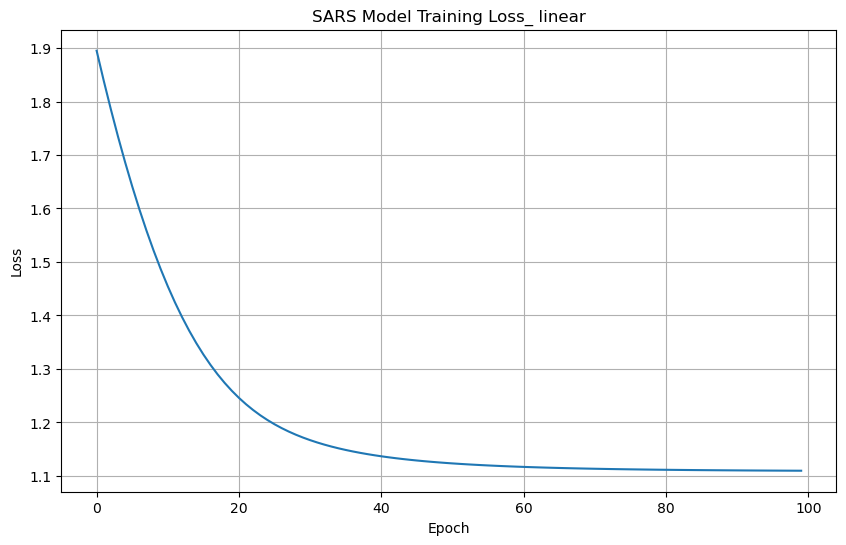

Using Linear kernel
Epoch 10/100 | Loss: 1.459
Epoch 20/100 | Loss: 1.214
Epoch 30/100 | Loss: 1.113
Epoch 40/100 | Loss: 1.074
Epoch 50/100 | Loss: 1.057
Epoch 60/100 | Loss: 1.048
Epoch 70/100 | Loss: 1.044
Epoch 80/100 | Loss: 1.041
Epoch 90/100 | Loss: 1.039
Epoch 100/100 | Loss: 1.038


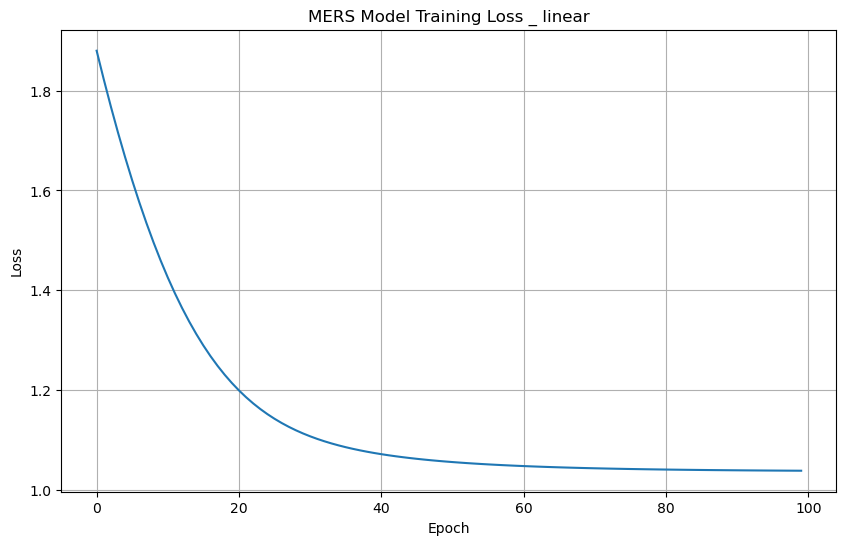

[18:46:40]  Success: Submitting competition predictions                                               ]8;id=273509;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=769993;file:///home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/polaris/utils/context.py#53\53]8;;\

Submission completed successfully!


In [63]:
def main():
    """Main execution function that handles both targets and submission."""
    # Setup environment
    po = setup_environment()
    from utils import dm  # Import dm here after environment setup
    
    # Load and prepare data
    competition = load_competition_data(po)
    mpro_df, test = prepare_dataset(competition)
    X_train, Y_sars, Y_mers, X_test = convert_to_fingerprints(mpro_df, test, dm)
    
    # Set seed for reproducibility
    torch.manual_seed(42)
    kernel_type = "linear"

    # Train model for SARS-CoV-2
    likelihood_sars = gpytorch.likelihoods.GaussianLikelihood()
    model_sars = GPRegressionModel(X_train, Y_sars, likelihood_sars, kernel_type="linear")
    model_sars, likelihood_sars, losses_sars = train_gp_model(
        train_x=X_train,
        train_y=Y_sars,
        likelihood=likelihood_sars,
        model=model_sars,
        epochs=100,
        lr=0.1,
        lr_decay=0.95
    )
    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(losses_sars)
    plt.title(f'SARS Model Training Loss_ {kernel_type}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    
    
    # Train model for MERS-CoV
    likelihood_mers = gpytorch.likelihoods.GaussianLikelihood()
    model_mers = GPRegressionModel(X_train, Y_mers, likelihood_mers, kernel_type="linear")
    model_mers, likelihood_mers, losses_mers = train_gp_model(
        train_x=X_train,
        train_y=Y_mers,
        likelihood=likelihood_mers,
        model=model_mers,
        epochs=100,
        lr=0.1,
        lr_decay=0.95
    )
    

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(losses_mers)
    plt.title(f'MERS Model Training Loss _ {kernel_type}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    # Generate predictions for both targets
    model_sars.eval()
    likelihood_sars.eval()
    model_mers.eval()
    likelihood_mers.eval()
    
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # SARS-CoV-2 predictions
        f_preds_sars = model_sars(X_test)
        mean_sars = f_preds_sars.mean.cpu().numpy()
        
        # MERS-CoV predictions
        f_preds_mers = model_mers(X_test)
        mean_mers = f_preds_mers.mean.cpu().numpy()
    
    # Create prediction dictionary for submission
    y_pred = {
        'pIC50 (SARS-CoV-2 Mpro)': mean_sars,
        'pIC50 (MERS-CoV Mpro)': mean_mers
    }
    
    # Submit predictions
    competition.submit_predictions(
        predictions=y_pred,
        prediction_name="gp-model-baseline",
        prediction_owner="caithmac",  # Replace with your username
        report_url="https://github.com/caithmac/polaris_potency_mpro",  # Optional, can be empty for now
        description="Gaussian Process Regression baseline with linear kernel",
        tags=["baseline", "gp-regression"],
        user_attributes={"Framework": "GPyTorch", "Method": "Gaussian Process Regression"}
    )
    
    print("Submission completed successfully!")
    
    return model_sars, model_mers, y_pred

if __name__ == "__main__":
    model_sars, model_mers, predictions = main()